# Recommender System - A basic example

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# To ignore font warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the reviews - TMDB 5000 movies dataset

In [2]:
tmdb_credits = pd.read_csv("data/tmdb_5000_credits.csv")
tmdb_movies = pd.read_csv("data/tmdb_5000_movies.csv")

tmdb_credits.shape, tmdb_movies.shape

((4803, 4), (4803, 20))

In [3]:
tmdb_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
tmdb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Merging Data - based on Movie ID

In [5]:
tmdb_credits_renamed = tmdb_credits.rename(columns = {"movie_id": "id"})

In [6]:
movie_reviews_merged = tmdb_movies.merge(tmdb_credits_renamed, on = "id")
movie_reviews_merged.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movie_reviews_cleaned = movie_reviews_merged[["original_title", "popularity", "vote_average", "vote_count"]]
movie_reviews_cleaned.head()

,original_title,popularity,vote_average,vote_count
0,Avatar,150.437577,7.2,11800
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500
2,Spectre,107.376788,6.3,4466
3,The Dark Knight Rises,112.312950,7.6,9106
4,John Carter,43.926995,6.1,2124


## Weighted Average Recommendation Engine
### Formula - 
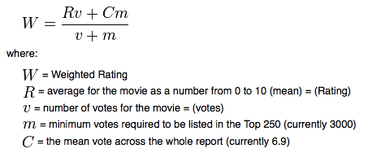
**Source** - <a href="http://trailerpark.weebly.com/imdb-rating.html?source=post_page">here</a>

In [8]:
v = movie_reviews_cleaned["vote_count"]
R = movie_reviews_cleaned["vote_average"]
C = movie_reviews_cleaned["vote_average"].mean()
m = movie_reviews_cleaned["vote_count"].quantile(0.6)

print("Mean vote accross the whole report: ", C)
print("Minimum votes required (65% quantile): ", m)

Mean vote accross the whole report:  6.092171559442016
Minimum votes required (65% quantile):  370.1999999999998


In [9]:
movie_reviews_cleaned["weighted_average"] = ((R*v) + (C*m)) / (v + m)

In [10]:
movie_reviews_cleaned.head()

,original_title,popularity,vote_average,vote_count,weighted_average
0,Avatar,150.437577,7.2,11800,7.166301
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.838594
2,Spectre,107.376788,6.3,4466,6.284091
3,The Dark Knight Rises,112.312950,7.6,9106,7.541095
4,John Carter,43.926995,6.1,2124,6.098838


In [11]:
movie_reviews_sorted = movie_reviews_cleaned.sort_values(by=["weighted_average"], ascending=False)
movie_reviews_sorted.head(10)

,original_title,popularity,vote_average,vote_count,weighted_average
1881,The Shawshank Redemption,136.747729,8.5,8205,8.396052
3337,The Godfather,143.659698,8.4,5893,8.263591
662,Fight Club,146.757391,8.3,9413,8.216455
3232,Pulp Fiction,121.463076,8.3,8428,8.207102
65,The Dark Knight,187.322927,8.2,12002,8.136930
1818,Schindler's List,104.469351,8.3,4329,8.126069
3865,Whiplash,192.528841,8.3,4254,8.123248
809,Forrest Gump,138.133331,8.2,7927,8.105954
2294,千と千尋の神隠し,118.968562,8.3,3840,8.105867
2731,The Godfather: Part II,105.792936,8.3,3338,8.079586


## 20 Best Movies - by Weighted Average

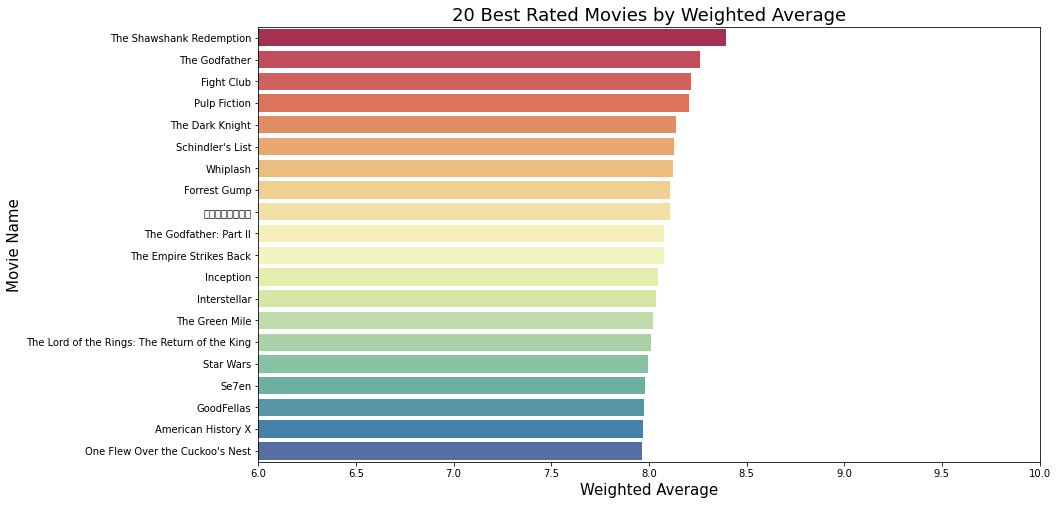

In [12]:
plt.figure(figsize = (14, 8))

sns.barplot(x = movie_reviews_sorted["weighted_average"].head(20), 
            y = movie_reviews_sorted["original_title"].head(20), 
            palette = "Spectral")

plt.title("20 Best Rated Movies by Weighted Average", fontsize=18)
plt.xlabel("Weighted Average", fontsize = 15)
plt.ylabel("Movie Name", fontsize = 15)
plt.xlim(6, 10)
plt.show()

## 20 Best Movies - by Popularity

In [13]:
popular_movies = movie_reviews_cleaned.sort_values(by=["popularity"], ascending=False)

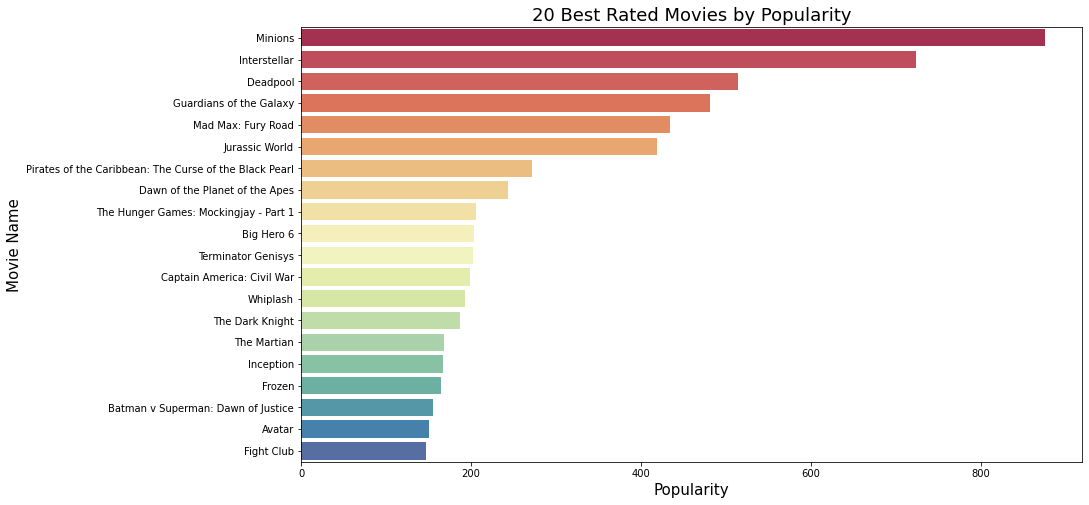

In [14]:
plt.figure(figsize = (14, 8))

sns.barplot(x = popular_movies["popularity"].head(20), 
            y = popular_movies["original_title"].head(20), 
            palette = "Spectral")

plt.title("20 Best Rated Movies by Popularity", fontsize=18)
plt.xlabel("Popularity", fontsize = 15)
plt.ylabel("Movie Name", fontsize = 15)

plt.show()

## Recommendation based on scaled weighted average and popularity
### Formula - 

            final score -> (0.5*weighted_average) + (0.5*popularity)

In [15]:
scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(movie_reviews_cleaned[["weighted_average", "popularity"]])

# Creating a dataframe for normalized scores
normalized_scores_df = pd.DataFrame(scaled_scores, 
                                    columns=["scaled_weighted_avg", "scaled_popularity"])

normalized_scores_df.head()

,scaled_weighted_avg,scaled_popularity
0,0.698297,0.171815
1,0.617898,0.158846
2,0.481858,0.122635
3,0.790248,0.128272
4,0.436409,0.050169


In [16]:
movie_reviews_cleaned[["scaled_weighted_avg", "scaled_popularity"]] = normalized_scores_df
movie_reviews_cleaned.head()

,original_title,popularity,vote_average,vote_count,weighted_average,scaled_weighted_avg,scaled_popularity
0,Avatar,150.437577,7.2,11800,7.166301,0.698297,0.171815
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.838594,0.617898,0.158846
2,Spectre,107.376788,6.3,4466,6.284091,0.481858,0.122635
3,The Dark Knight Rises,112.312950,7.6,9106,7.541095,0.790248,0.128272
4,John Carter,43.926995,6.1,2124,6.098838,0.436409,0.050169


In [17]:
movie_reviews_cleaned["final_score"] = 0.5*movie_reviews_cleaned["scaled_weighted_avg"] + \
                                       0.5*movie_reviews_cleaned["scaled_popularity"]

In [18]:
movie_reviews_cleaned.head()

,original_title,popularity,vote_average,vote_count,weighted_average,scaled_weighted_avg,scaled_popularity,final_score
0,Avatar,150.437577,7.2,11800,7.166301,0.698297,0.171815,0.435056
1,Pirates of the Caribbean: At World's End,139.082615,6.9,4500,6.838594,0.617898,0.158846,0.388372
2,Spectre,107.376788,6.3,4466,6.284091,0.481858,0.122635,0.302247
3,The Dark Knight Rises,112.312950,7.6,9106,7.541095,0.790248,0.128272,0.459260
4,John Carter,43.926995,6.1,2124,6.098838,0.436409,0.050169,0.243289


In [19]:
final_movie_reviews = movie_reviews_cleaned.sort_values(by=["final_score"], ascending=False)
final_movie_reviews.head()

,original_title,popularity,vote_average,vote_count,weighted_average,scaled_weighted_avg,scaled_popularity,final_score
95,Interstellar,724.247784,8.1,10867,8.033854,0.911140,0.827162,0.869151
546,Minions,875.581305,6.4,4571,6.376937,0.504637,1.000000,0.752319
94,Guardians of the Galaxy,481.098624,7.9,9742,7.833817,0.862063,0.549462,0.705763
788,Deadpool,514.569956,7.4,10995,7.357400,0.745181,0.587690,0.666435
127,Mad Max: Fury Road,434.278564,7.2,9427,7.158139,0.696295,0.495989,0.596142


## 20 Best Movies - by Score

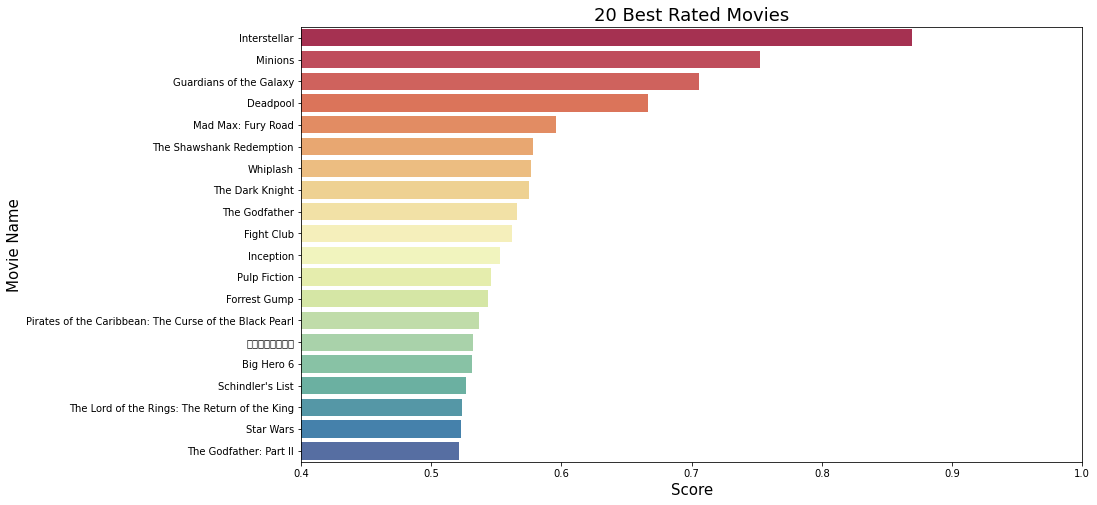

In [20]:
plt.figure(figsize = (14, 8))

sns.barplot(x = final_movie_reviews["final_score"].head(20), 
            y = final_movie_reviews["original_title"].head(20), 
            palette = "Spectral")

plt.title("20 Best Rated Movies", fontsize=18)
plt.xlabel("Score", fontsize = 15)
plt.ylabel("Movie Name", fontsize = 15)
plt.xlim(0.4, 1)
plt.show()